<a href="https://colab.research.google.com/github/likhithaap/Potato-disease-classification-deep-learning-/blob/main/potato_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
file=os.listdir('.')
print(file)

['.config', 'drive', 'sample_data']


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("./drive/MyDrive/Datasets/Potato/Test", shuffle= True, image_size=(256, 256), batch_size= 32)

Found 300 files belonging to 3 classes.


In [ ]:
class_names= dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


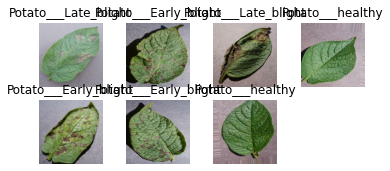

In [ ]:
for image_batch, label_batch in dataset.take(1):
 for i in range(7):
    ax= plt.subplot(3,4,i+1)
    print(image_batch[i].shape)
    plt.imshow(image_batch[i].numpy().astype("uint"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
resize_and_rescale= tf.keras.Sequential(
    [
     layers.experimental.preprocessing.Resizing(256, 256),
     layers.experimental.preprocessing.Rescaling(0.1/255)     
    ]
)

Data augmentation 

In [ ]:
data_augment = tf.keras.Sequential([
                     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"
),
                     layers.experimental.preprocessing.RandomRotation(
    0.4
)
])

In [ ]:

model = models.Sequential([
    resize_and_rescale,
    data_augment,
    layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, 'relu'),
    layers.Dense(3, activation='softmax')]
)
model.build(input_shape= (256, 256, 3))

ValueError: ignored